## Tarea 12


__Ejercicio 1: __  Método de Euler implícito

Paqueterías

In [181]:
using Plots
using SymPy

Funciones definidas


In [221]:
x=symbols("x")
t=symbols("t")
f(x,t)=-2.5x  # Esta funcion la utilicé en todos mis test, y en especial nos sirve para el ejercicio 5


f (generic function with 1 method)

 Metodo de Euler explícito (Versión con rutinas separadas y versión para cualquier dimensión)

In [256]:
function MetodoEuler(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    x=xo
    for i in 1:length(listt)-1
    x=x+h*f(x,listt[i])
        push!(listx,x)
    end
    return listt,listx
end


function MetodoEuler_2D(f,g,xo,uo,to,t,h)
    listt=to:h:t
    listx=[xo]
    listu=[uo]
    for i in 1:length(listt)-1
    uo=uo+h*g(Float64(xo),listt[i])  
    xo=xo+h*f(Float64(uo),listt[i]) 
        push!(listx,xo)
        push!(listu,uo)
    end
    return listt,listx,listu
end
        

MetodoEuler_2D (generic function with 1 method)

Método de Newton

In [223]:
function NewtonSympy(f,xo,t) #Esta funcion admite una condicion inicial o un intervalo de donde toma las condiciones iniciales
Xk=[]
df(y,t)=N(diff(f(x,t),x))
    while abs(f(xo,t))>1e-6
        xo=xo-f(xo,t)/df(xo,t)
        push!(Xk,xo)
    end    
    xo
end

NewtonSympy (generic function with 1 method)

Método de Euler implicito

In [224]:
function MetodoEuler_implicito(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
   
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    g(x,s)=x-h*f(x,listt[i])-xo #aqui definimos la función de la cual obtendremos la raiz usando el método de Newton 
    xo=xo+h*f(NewtonSympy(g,Float64(xo),listt[i]),listt[i+1]) #aqui estamos aplicando el método de Newton con las raices encontradas con Newton
       
        push!(listx,xo)
    end
    return listt,listx
end

MetodoEuler_implicito (generic function with 1 method)

__ Test __

In [225]:
h1=MetodoEuler_implicito(f,1.0,0.0,8.0,0.1)
h2=MetodoEuler_implicito(f,1.0,0.0,8.0,0.01)

(0.0:0.01:8.0, [1.0, 0.97561, 0.951814, 0.928599, 0.905951, 0.883854, 0.862297, 0.841265, 0.820747, 0.800728  …  2.59564e-9, 2.53075e-9, 2.46748e-9, 2.4058e-9, 2.34565e-9, 2.28701e-9, 2.22984e-9, 2.17409e-9, 2.11974e-9, 2.06674e-9])


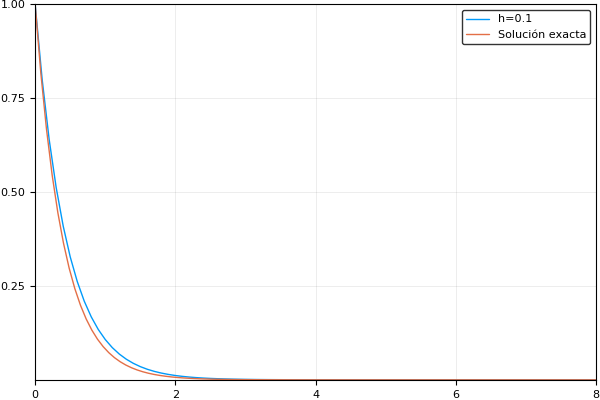

In [226]:
plot(h1,label="h=0.1")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")


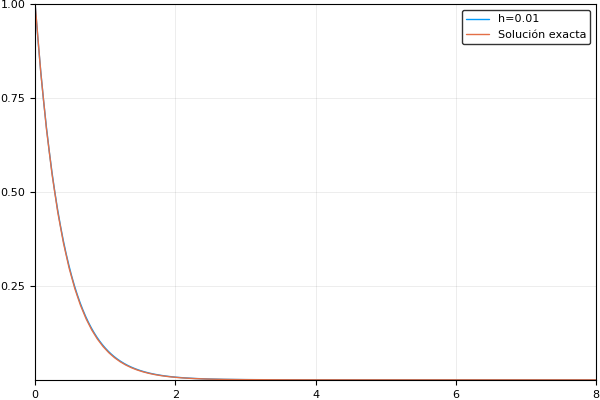

In [227]:
plot(h2,label="h=0.01")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

Podemos notar que la solución de este método se aproxima a la solución exacta conforme h es más pequeña, además de que tarda un poco (muy poco para esta ecuación porque es sencilla la inversión) más en converger hablando de tiempo esto porque tiene que invertir una ecuación cada paso del método.


__ Ejercicio 2: __ Euler punto medio

In [228]:
function MetodoEuler_medio(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    xo=xo+h*f(xo+(0.5*h)f(xo,listt[i]),listt[i]+h/2)
        
        push!(listx,xo)
    end
    return listt,listx
end

MetodoEuler_medio (generic function with 1 method)

In [229]:
h1=MetodoEuler_medio(f,1.0,0.0,8.0,0.1)
h2=MetodoEuler(f,1.0,0.0,8.0,0.01)

(0.0:0.01:8.0, [1.0, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9, 1.59843e-9])


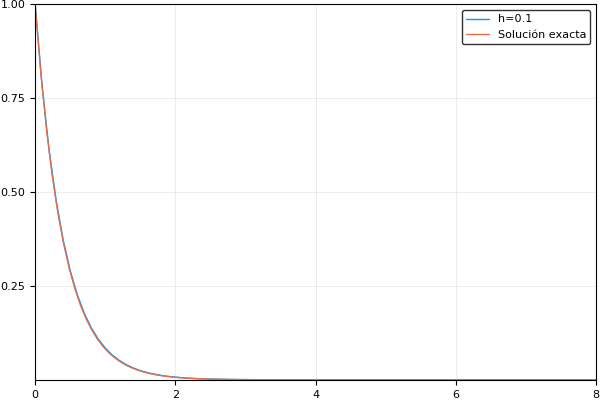

In [230]:
plot(h1,label="h=0.1")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")


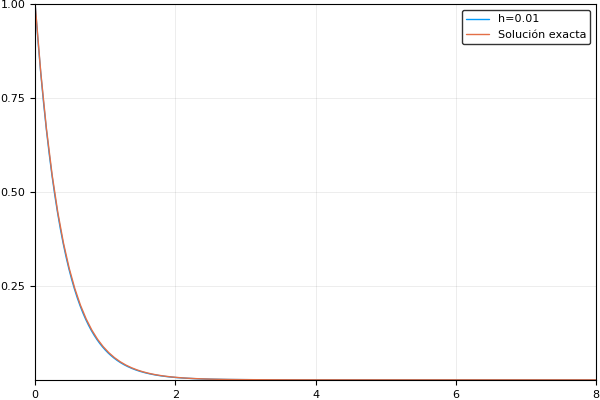

In [231]:
plot(h2,label="h=0.01")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

__ Ejercicio 3:__ Runge Kutta orden 4

Primero programé el método de RungeKutta de orden 2 y 3 para corroborar que su error era del orden que dice el método, luego al final programé el método de orden 4. 

__ Runge Kutta orden 2 __

In [232]:
function RungeKutta2nd(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    k1=f(xo,listt[i])
    k2=f(xo+h*k1,listt[i]+h)   
    xo=xo+(h/2)*(k1+k2)
        
        push!(listx,xo)
    end
    return listt,listx
end

RungeKutta2nd (generic function with 1 method)

__ Test __

In [233]:
h1=RungeKutta2nd(f,1.0,0.0,8.0,0.1)
h2=RungeKutta2nd(f,1.0,0.0,8.0,0.01)

(0.0:0.01:8.0, [1.0, 0.975313, 0.951234, 0.927751, 0.904847, 0.882509, 0.860722, 0.839473, 0.818748, 0.798535  …  2.58665e-9, 2.52279e-9, 2.46051e-9, 2.39977e-9, 2.34053e-9, 2.28274e-9, 2.22639e-9, 2.17142e-9, 2.11782e-9, 2.06553e-9])


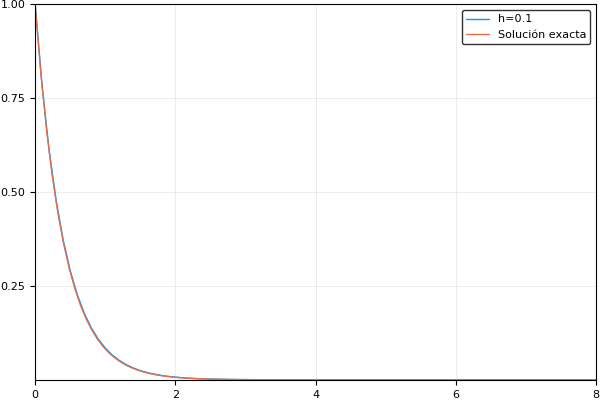

In [234]:
plot(h1,label="h=0.1")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")


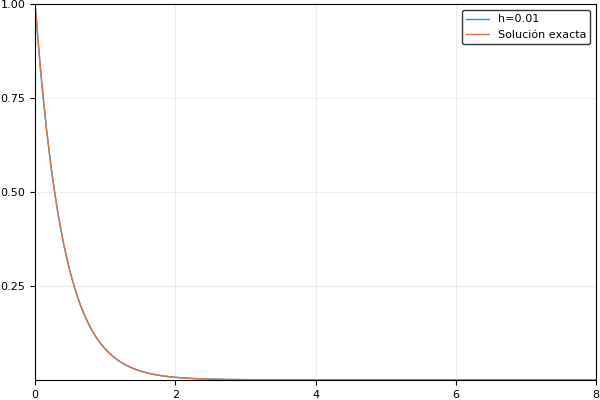

In [235]:
plot(h2,label="h=0.01")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

__ Runge Kutta orden 3 __

In [236]:
function RungeKutta3rd(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    k1=f(xo,listt[i])
    k2=f(xo+(h/2)*k1,listt[i]+h/2) 
    k3=f(xo-h*k1+2h*k2,listt[i]+h)    
    xo=xo+(h/6)*(k1+4k2+k3)
        
        push!(listx,xo)
    end
    return listt,listx
end

RungeKutta3rd (generic function with 1 method)

__ Test __

In [237]:
h1=RungeKutta3rd(f,1.0,0.0,8.0,0.1)
h2=RungeKutta3rd(f,1.0,0.0,8.0,0.1)

(0.0:0.1:8.0, [1.0, 0.778646, 0.606289, 0.472085, 0.367587, 0.28622, 0.222864, 0.173532, 0.13512, 0.105211  …  1.92814e-8, 1.50133e-8, 1.16901e-8, 9.10243e-9, 7.08757e-9, 5.51871e-9, 4.29712e-9, 3.34593e-9, 2.6053e-9, 2.0286e-9])


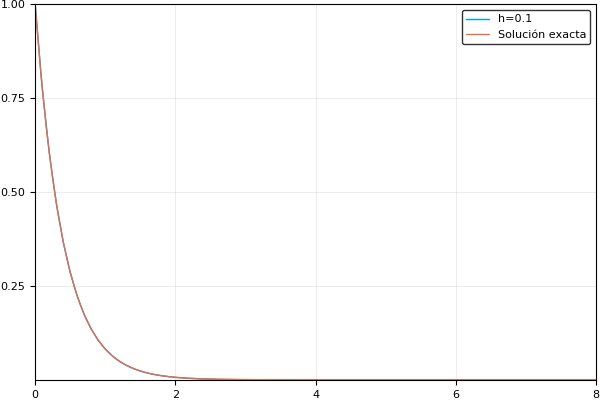

In [238]:
plot(h1,label="h=0.1")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")


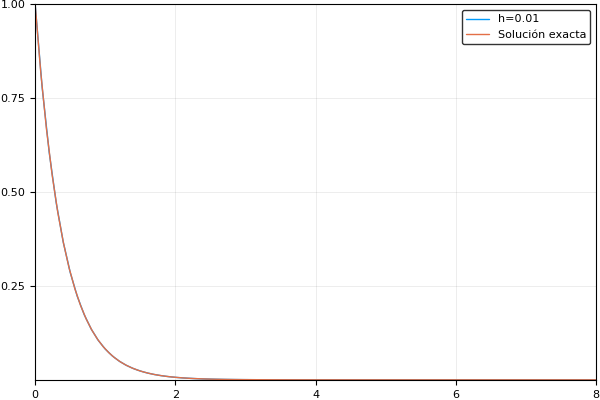

In [239]:
plot(h2,label="h=0.01")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

__ Runge Kutta orden 4 __

In [240]:
function RungeKutta4th(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    x=xo
    for i in 1:length(listt)-1
        
    k1=f(x,listt[i])
    k2=f(x+(h/2)*k1,listt[i]+h/2) 
    k3=f(x+(h/2)*k2,listt[i]+h/2) 
    k4=f(x+h*k3,listt[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x)
    end
    return listt,listx
end

RungeKutta4th (generic function with 1 method)

__ Test __

In [241]:
h1=RungeKutta4th(f,1.0,0.0,8.0,0.1)
h2=RungeKutta4th(f,1.0,0.0,8.0,0.01)

(0.0:0.01:8.0, [1.0, 0.97531, 0.951229, 0.927743, 0.904837, 0.882497, 0.860708, 0.839457, 0.818731, 0.798516  …  2.58123e-9, 2.5175e-9, 2.45534e-9, 2.39472e-9, 2.33559e-9, 2.27793e-9, 2.22168e-9, 2.16683e-9, 2.11333e-9, 2.06115e-9])


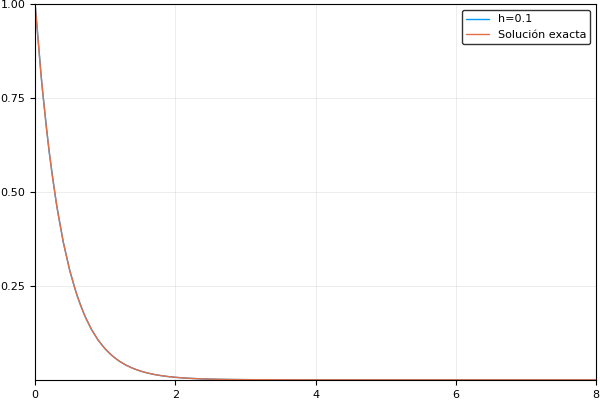

In [242]:
plot(h1,label="h=0.1")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")


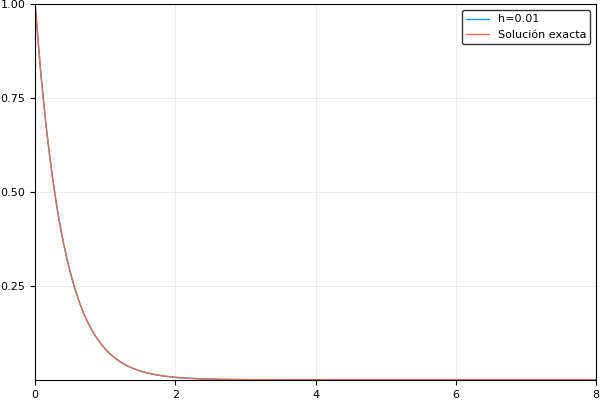

In [244]:
plot(h2,label="h=0.01")
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

__ Ejercicio 5__ (En el notebook no viene el ejercicio 4) 

Este ejercicio lo hice en el primer Test del ejercicio 1, ya que usé como función para el test la misma que nos piden para comparar. :) 


__ Ejercicio 6: __  Resolver la ecuacion asociada a h(x,t)=(2x-18t)/(1+t) con el método del punto medio y de runge kutta

Funciones para resolver

In [245]:
F(x,t)=(2x-18t)/(1+t) # Esta función me va a servir para el ejercicio 6
s(t)=4+8*t-5t^2 #Esta función es la solución exacta a la ecuacion diferencial asociada a h(x,t)

s (generic function with 1 method)

In [246]:
h1=MetodoEuler_medio(F,4.0,0.0,20.0,1)
h2=RungeKutta4th(F,4.0,0.0,20.0,1)
h3=MetodoEuler_medio(F,4.0,0.0,20.0,0.1)
h4=RungeKutta4th(F,4.0,0.0,20.0,0.1)

(0.0:0.1:20.0, [4.0, 4.75001, 5.40002, 5.95003, 6.40004, 6.75005, 7.00006, 7.15007, 7.20008, 7.15009  …  -1667.24, -1685.59, -1704.04, -1722.59, -1741.24, -1759.99, -1778.84, -1797.79, -1816.84, -1835.99])


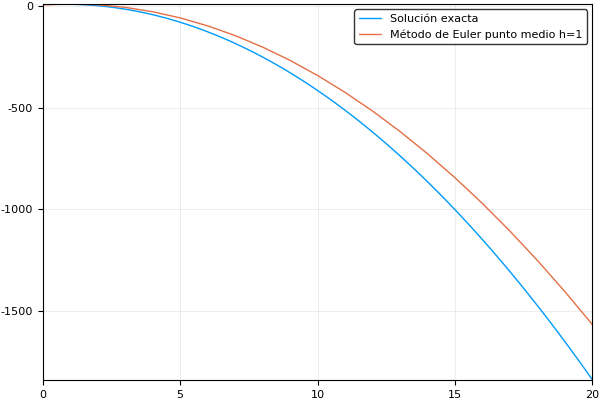

In [247]:
plot(linspace(1,20,100),s,label="Solución exacta")
plot!(h1,label="Método de Euler punto medio h=1")


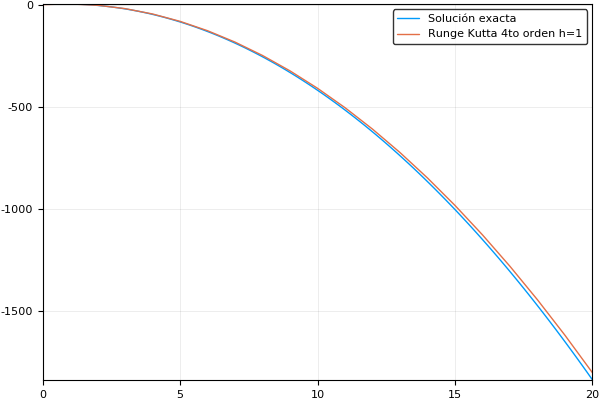

In [248]:
plot(linspace(1,20,100),s,label="Solución exacta")
plot!(h2,label="Runge Kutta 4to orden h=1")

Primero resolví la ecuación con h=1 para que se viera la diferencia entre los dos métodos, claramente el método de runge kutta se aproxima más a la solución exacta.


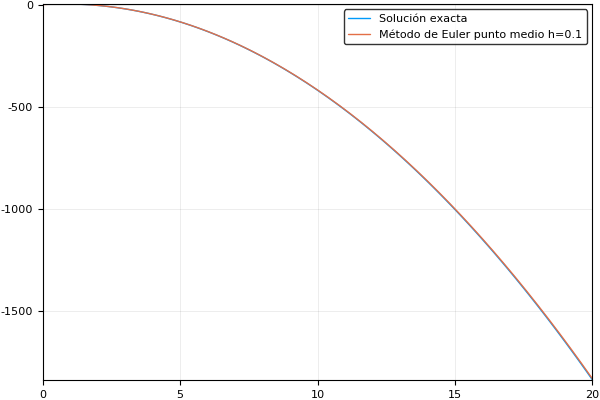

In [249]:
plot(linspace(1,20,100),s,label="Solución exacta")
plot!(h3,label="Método de Euler punto medio h=0.1")


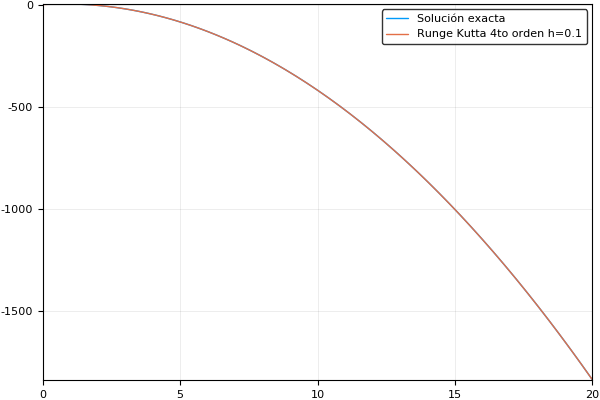

In [250]:
plot(linspace(1,20,100),s,label="Solución exacta")
plot!(h4,label="Runge Kutta 4to orden h=0.1")

Veamos que para h=0.1 los dos métodos convergen a la solución exacta de manera muy precisa, en ambos casos los métodos son superiores al método de Euler simple, pues con un orden de magnitud menor se obtiene una mejor aproximación. 

 __ Ejercicio 7 __ Resolver el oscilador armónico. Con Euler explicito y Runge kutta. (En el notebook nos piden comparar con el método de Euler Explicito)

Funciones que voy a utilizar

In [251]:
f(x,t)=[x[2],-x[1]]
exacta(t)=sin(t)

exacta (generic function with 1 method)

In [252]:
σ=RungeKutta4th(f,[0.0,1.0],0.0,2*pi,0.1);

El método de Runge Kutta que hicimos anteriormente nos sirve para cualquier dimension sin embargo debemos manipular la información que nos arroja, primero nos da el valor del arreglo de tn, luego nos da un arreglo con vectores de dos entradas que contienen la iteracion de cada variable, a continuación extraeremos la información de cada entrada para graficarla.

In [253]:
x1=[]
x2=[]
τ=σ[1]
for i in 1:length(σ[2])
push!(x1,σ[2][i][1])
push!(x2,σ[2][i][2])   
end


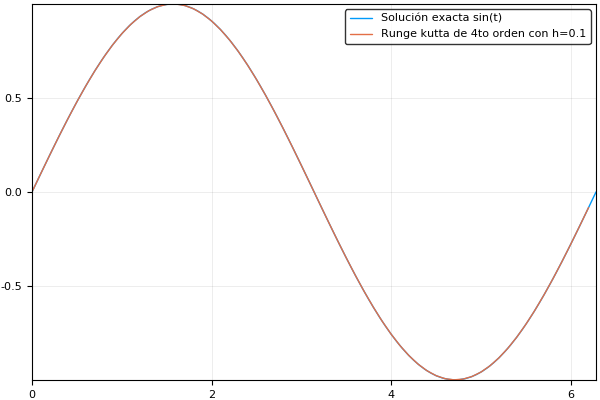

In [254]:
plot(linspace(0,2*pi,100),exacta,label="Solución exacta sin(t)")
plot!(τ,x1,label="Runge kutta de 4to orden con h=0.1")

Ahora que resolvimos la ecuacion diferencial y vemos que si corresponde a la solución podemos hacer la gráfica de las energías del Osilador $E=T+V$ vamos a suponer m=1 de modo que nos queda $$ E=\frac{x^2}{2}+\frac{v^2}{2}$$


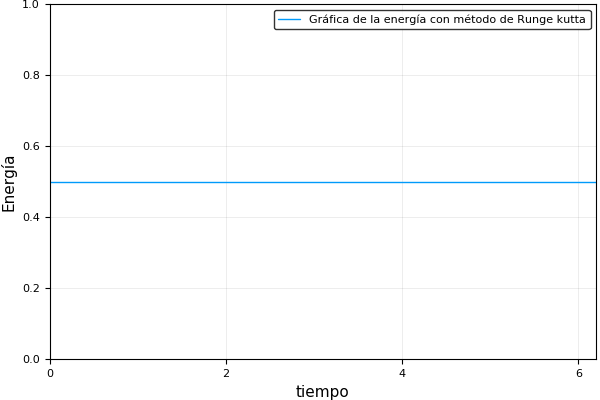

In [216]:
plot(τ,(x2.^2+x1.^2)*0.5,ylims=(0,1),xlabel="tiempo",ylabel="Energía",label="Gráfica de la energía con método de Runge kutta")


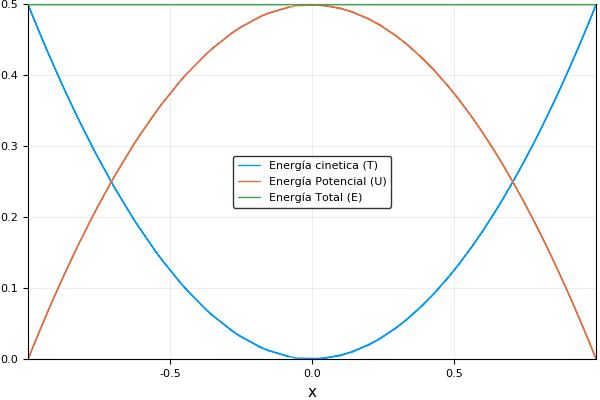

In [217]:
plot(x1,0.5x1.^2,xlabel="x",label="Energía cinetica (T)")
plot!(x1,0.5x2.^2,label="Energía Potencial (U)")
plot!(x1,0.5x1.^2+0.5x2.^2,label="Energía Total (E)")

In [218]:
γ=MetodoEuler(f,[0.0,1.0],0.0,2*pi,0.1)

(0.0:0.1:6.2, Array{Float64,1}[[0.0, 1.0], [0.1, 1.0], [0.2, 0.99], [0.299, 0.97], [0.396, 0.9401], [0.49001, 0.9005], [0.58006, 0.851499], [0.66521, 0.793493], [0.744559, 0.726972], [0.817256, 0.652516]  …  [-1.09588, 0.702502], [-1.02563, 0.81209], [-0.944422, 0.914654], [-0.852957, 1.0091], [-0.752047, 1.09439], [-0.642608, 1.1696], [-0.525649, 1.23386], [-0.402263, 1.28642], [-0.273621, 1.32665], [-0.140956, 1.35401]])

In [219]:
x1=[]
x2=[]
τ=γ[1]
for i in 1:length(γ[2])
push!(x1,γ[2][i][1])
push!(x2,γ[2][i][2])   
end


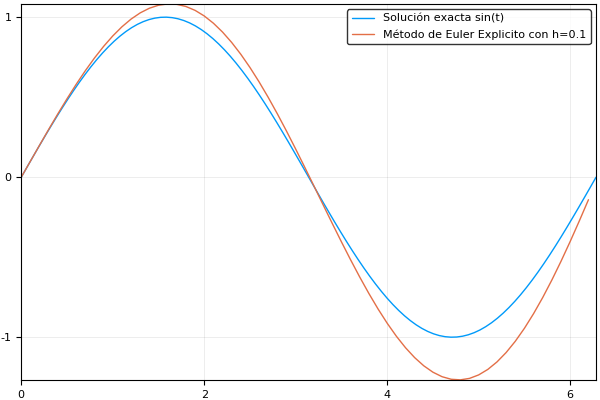

In [220]:
plot(linspace(0,2*pi,100),exacta,label="Solución exacta sin(t)")
plot!(τ,x1,label="Método de Euler Explicito con h=0.1")



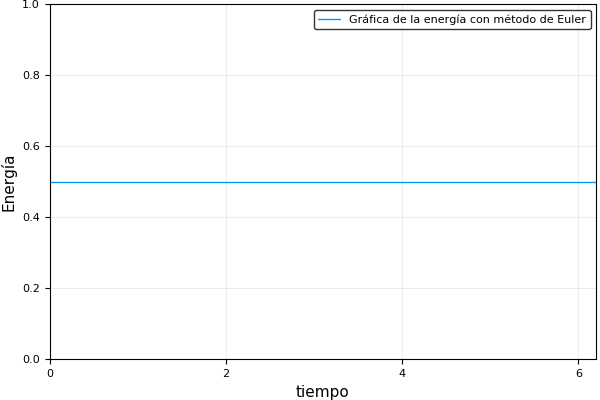

In [255]:
plot(τ,(x2.^2+x1.^2)*0.5,ylims=(0,1),xlabel="tiempo",ylabel="Energía",label="Gráfica de la energía con método de Euler")


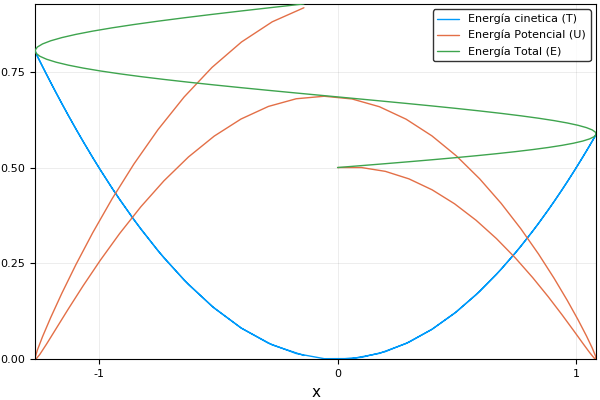

In [180]:
plot(x1,0.5x1.^2,xlabel="x",label="Energía cinetica (T)")
plot!(x1,0.5x2.^2,label="Energía Potencial (U)")
plot!(x1,0.5x1.^2+0.5x2.^2,label="Energía Total (E)")

Podemos ver que el método de Runge kutta nos dio una solución más aproximada para la misma h=0.1 por lo que cuncluimos que tiene un error más pequeño. Cuando hacemos Euler con h=0.01 la solución es más aproximada pero usar la misma h=0.1 nos permite comparar los dos métodos :)
Además podemos notar que la energía ya no parece constante para el método de Euler con h=0.1 lo cual es un reflejo de que la solución es una aproximación menos precisa que la de Runge kutta, en la última gráfica de la nergíua podemos ver que el mayor error se encuentra en la derivada cada que encuentra un punto de retorno no vuelve por el mismo camino si no que tiene un pequeño error el método de Euler, cabe mencionar que para h=0.01 el método de Euler adquiere la precision necesaria para mostrar una erngía constante como con el método de Runge kutta. :) 


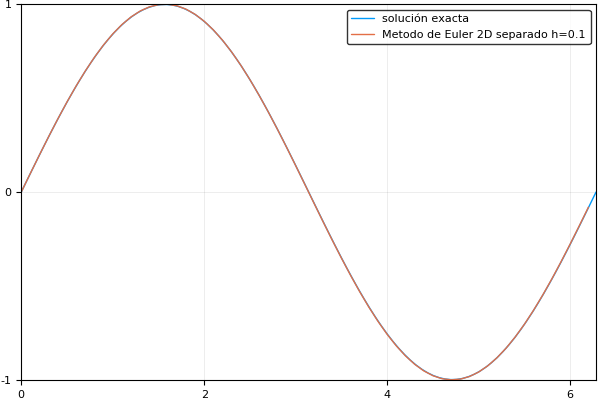

In [260]:
g(x,t)=-x
f(u,t)=u
h2=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)[1],MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)[2]

x1=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)[2]
x2=MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)[3]
solucionexacta(t)=sin(t)
plot(linspace(0,2*pi,100),solucionexacta,label="solución exacta")
plot!(h2,label="Metodo de Euler 2D separado h=0.1")

Algo remarcable es que si bien podemos definir con vectores el método de Euler para cualquier dimension hacer la rutina por separado para cada variable aumenta la precisión del método, veamos que para h=0.1 el mismo método pero sin vectores da una mejor precisión.


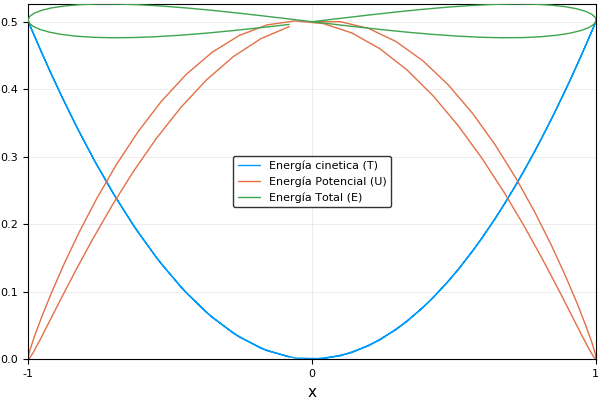

In [261]:
plot(x1,0.5x1.^2,xlabel="x",label="Energía cinetica (T)")
plot!(x1,0.5x2.^2,label="Energía Potencial (U)")
plot!(x1,0.5x1.^2+0.5x2.^2,label="Energía Total (E)")


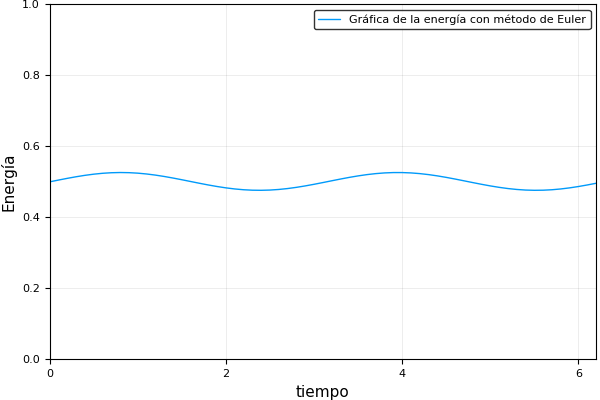

In [262]:
plot(MetodoEuler_2D(f,g,0.0,1.0,0.0,2*pi,0.1)[1],(x2.^2+x1.^2)*0.5,ylims=(0,1),xlabel="tiempo",ylabel="Energía",label="Gráfica de la energía con método de Euler")

Notemos que el método de Euler no vectorial es más preciso :) 